Для начала, подключим библиотеки и инициализируем выборку, чтобы перейти к выполнению **пункта 1**.

In [ ]:
import numpy as np #подключение библиотек
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
data = np.array([107, 78, 93, 81, 80, 92, 126, 93, 67, 50, 104, 110,
                 120, 91, 101, 91, 120, 88, 69, 74, 102, 65, 48, 71,
                 103, 67, 95, 112, 112, 86, 99, 99, 103, 122, 112, 102,
                 92, 69, 105, 106, 124, 46, 72, 75, 126, 73, 106, 75,
                 80, 92, 68, 112, 127, 88, 93, 74, 131, 51, 117, 145,
                 96, 76, 71, 138, 104, 120, 67, 92, 130, 99, 94, 92,
                 97, 105, 84, 78, 100, 98, 114, 113, 94, 108, 76, 88,
                 91, 78, 96, 81, 116, 75, 120, 75, 62, 113, 109, 111,
                 127, 63, 87, 86, 66, 100 ,75 , 84, 95, 121, 103, 95,
                 70, 98, 67, 148, 95, 92, 105, 114, 98, 102, 41, 76,
                 114, 90, 97, 111, 93, 110, 79, 63, 109, 69, 108, 71,
                 111, 100, 136, 92, 84, 123, 84, 125, 102, 96, 72, 102,
                 90, 136, 87, 132, 137, 100, 102, 88, 65, 75, 114, 79,
                 122, 63, 115, 90, 78, 86, 122, 119, 87, 115, 96, 137,
                 106, 105, 88, 75, 100, 84, 71, 123, 121, 94, 114, 94,
                 93, 118, 94, 102, 109, 86, 45, 97, 93, 43, 48, 114,
                 85, 79, 124, 89, 104, 108, 108, 100, 106, 102, 105, 119,
                 71, 86, 115, 82, 101]) #инициализация выборки

**Пункт 1:** найти максимальный и минимальный элементы выборки, найти размах

In [ ]:
data_max, data_min = max(data), min(data)
scope = data_max - data_min
n = len(data)
print(f"Максимальный элемент: {data_max}\nМинимальный элемент: {data_min}\nРазмах: {scope}")

Максимальный элемент: 148
Минимальный элемент: 41
Размах: 107


**Пункт 2:** определение количества интервалов и длину интервала группировки разными методами

Правило Стёрджеса:
$$
k = 1 + |\log_{2}{n}|
$$
где $n$ - размер выборки

Правило Скотта:
$$
h = \frac{3,49 \cdot \sigma}{n^{1/3}}
$$
где $\sigma$ - стандартное отклонение выборки

Правило Фридмана-Диакониса:
$$
h = 2 \cdot \frac{IQR}{n^{1/3}}
$$
где $IQR$ - межквартильный размах

In [ ]:
# 1. Правило Стёрджеса
k_sturges = int(1 + np.log2(n))
h_sturges = scope / k_sturges

# 2. Правило Скотта
std_dev = np.std(data, ddof=1)  # исправленное стандартное отклонение
h_scott = (3.49 * std_dev) / (n ** (1/3))
k_scott = int(np.ceil(scope / h_scott))

# 3. Правило Фридмана-Диакониса
data_iqr = scipy.stats.iqr(data)  # межквартильный размах
h_fd = 2 * data_iqr / (n ** (1/3))
k_fd = int(np.ceil(scope / h_fd))

print("\nИнтервалы и их длина разными методами:")
print(f"1. Правило Стёрджеса: k = {k_sturges}, h ≈ {h_sturges:.2f}")
print(f"2. Правило Скотта:     k = {k_scott}, h ≈ {h_scott:.2f}")
print(f"3. Фридман-Диаконис:  k = {k_fd}, h ≈ {h_fd:.2f}")


Интервалы и их длина разными методами:
1. Правило Стёрджеса: k = 8, h ≈ 13.38
2. Правило Скотта:     k = 9, h ≈ 12.28
3. Фридман-Диаконис:  k = 11, h ≈ 10.11


Возьмем среднее по всем параметрам, округлим, и получим оптимальное количество интервалов, а также их длину

In [ ]:
k_recommend, h_recommend = int((k_sturges + k_scott + k_fd) / 3), round((h_sturges + h_scott + h_fd) / 3, 2)
print(f"Полученные рекомендованные интервалы и их длина: {k_recommend}, {h_recommend}")

Полученные рекомендованные интервалы и их длина: 9, 11.92


**Пункт 3:** построение интервального ряда и гистограммы, а также полигона ряда

In [ ]:
# Создание интервалов
bins = np.arange(data_min, data_max + h_recommend, h_recommend)
intervals = [(bins[i], bins[i+1]) for i in range(len(bins)-1)]

# Подсчет частот
freq, _ = np.histogram(data, bins=bins)

# Построение интервального ряда
print("Интервальный ряд:")
print("Интервал\tЧастота")
for interval, count in zip(intervals, freq):
    print(f"{round(interval[0],2)}-{round(interval[1],2)}\t{count}")


Интервальный ряд:
Интервал	Частота
41.0-52.92	8
52.92-64.84	4
64.84-76.76	32
76.76-88.68	31
88.68-100.6	48
100.6-112.52	42
112.52-124.44	29
124.44-136.36	10
136.36-148.28	5


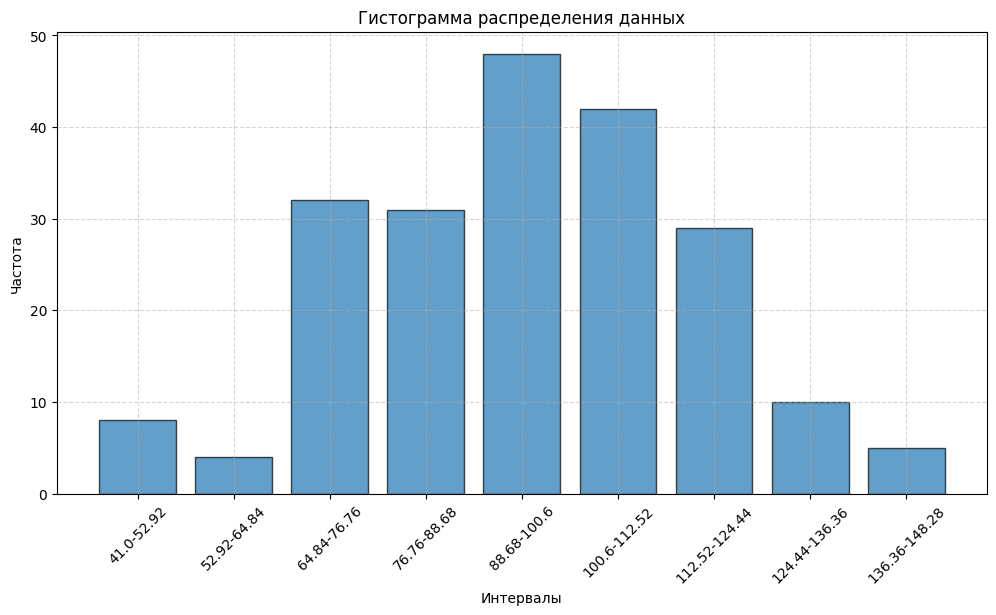

In [ ]:
# Построение гистограммы
plt.figure(figsize=(12, 6))
plt.bar([f"{round(interval[0],2)}-{round(interval[1],2)}" for interval in intervals], freq, width=0.8, edgecolor='black', alpha=0.7)
plt.title("Гистограмма распределения данных")
plt.xlabel("Интервалы")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

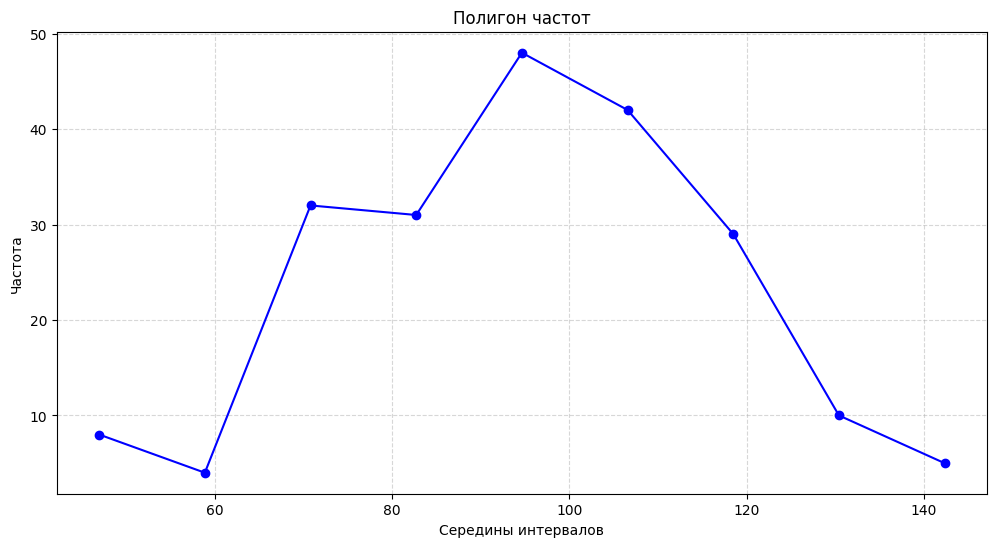

In [ ]:
# Построение полигона частот
midpoints = [(interval[0] + interval[1]) / 2 for interval in intervals]
plt.figure(figsize=(12, 6))
plt.plot(midpoints, freq, marker='o', linestyle='-', color='b')
plt.title("Полигон частот")
plt.xlabel("Середины интервалов")
plt.ylabel("Частота")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Пункт 4:** нахождение моды, медианы, коэффициента ассиметрии и эксцесса

In [ ]:
# 1. Мода (наиболее часто встречающееся значение)
mode_result = scipy.stats.mode(data)
print(f"Мода: {mode_result.mode} (встречается {mode_result.count} раз(а))")

# 2. Медиана
median = np.median(data)
print(f"Медиана: {median}")

# 3. Коэффициент асимметрии (skewness)
skewness = scipy.stats.skew(data)
print(f"Коэффициент асимметрии: {skewness:.4f}")

# 4. Коэффициент эксцесса (kurtosis)
# Fisher's kurtosis (нормальное распределение имеет эксцесс 0)
kurtosis = scipy.stats.kurtosis(data, fisher=True)
print(f"Коэффициент эксцесса (по Фишеру): {kurtosis:.4f}")

# Pearson's kurtosis (нормальное распределение имеет эксцесс 3)
kurtosis_pearson = scipy.stats.kurtosis(data, fisher=False)
print(f"Коэффициент эксцесса (по Пирсону): {kurtosis_pearson:.4f}")

Мода: 102 (встречается 8 раз(а))
Медиана: 96.0
Коэффициент асимметрии: -0.1446
Коэффициент эксцесса (по Фишеру): -0.1508
Коэффициент эксцесса (по Пирсону): 2.8492


Построение гистограммы с модой

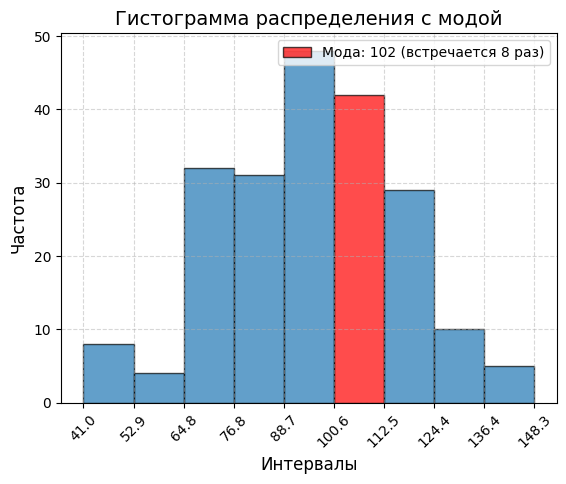

In [ ]:
freq, bins, patches = plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
# Находим моду (значение с наибольшей частотой)
unique_values, counts = np.unique(data, return_counts=True)
mode_value = unique_values[np.argmax(counts)]
mode_count = np.max(counts)

# Выделяем интервал, содержащий моду
for i in range(len(patches)):
    if bins[i] <= mode_value < bins[i+1]:
        patches[i].set_facecolor('red')
        patches[i].set_label(f'Мода: {mode_value} (встречается {mode_count} раз)')
        break
plt.title(f'Гистограмма распределения с модой', fontsize=14)
plt.xlabel('Интервалы', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.xticks(bins, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

**Пункт 5:** построение эмпирической функции распределения и её графика, кумуляты

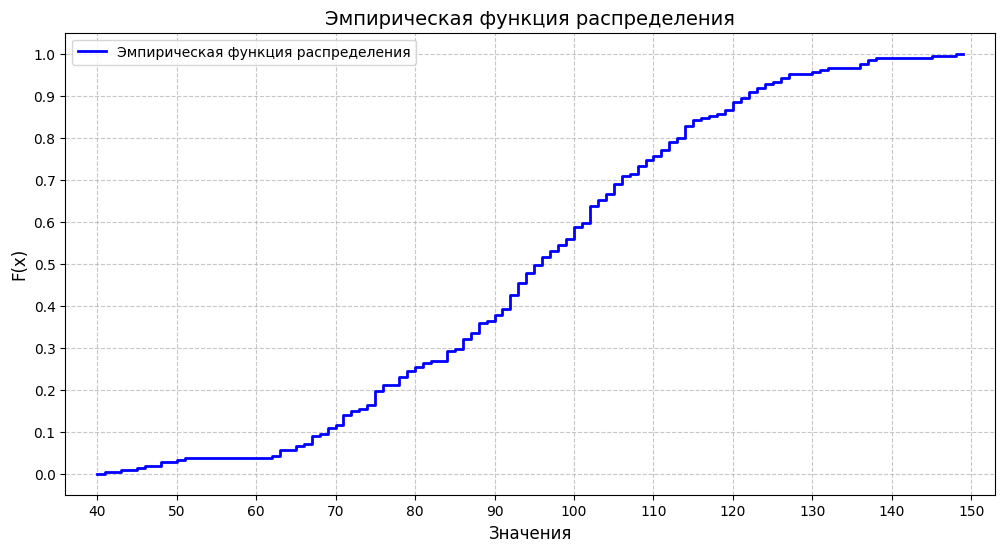

In [ ]:
unique_values, counts = np.unique(data, return_counts=True)
x = np.sort(unique_values)
y = np.cumsum(counts) / n

x_efr = np.repeat(x, 2)
x_efr = np.insert(x_efr, 0, x[0]-1)
x_efr = np.append(x_efr, x[-1]+1)

y_efr = np.repeat(y, 2)
y_efr = np.insert(y_efr, 0, 0)
y_efr = np.append(y_efr, 1)

# Построение графика
plt.figure(figsize=(12, 6))
plt.step(x_efr, y_efr, where='post', color='b', linewidth=2, label='Эмпирическая функция распределения')

plt.title('Эмпирическая функция распределения', fontsize=14)
plt.xlabel('Значения', fontsize=12)
plt.ylabel('F(x)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(np.arange(min(x)//10*10, max(x)+10, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlim(min(x)-5, max(x)+5)

plt.legend()
plt.show()

Построение кумуляты

Кумулята показывает накопление частот

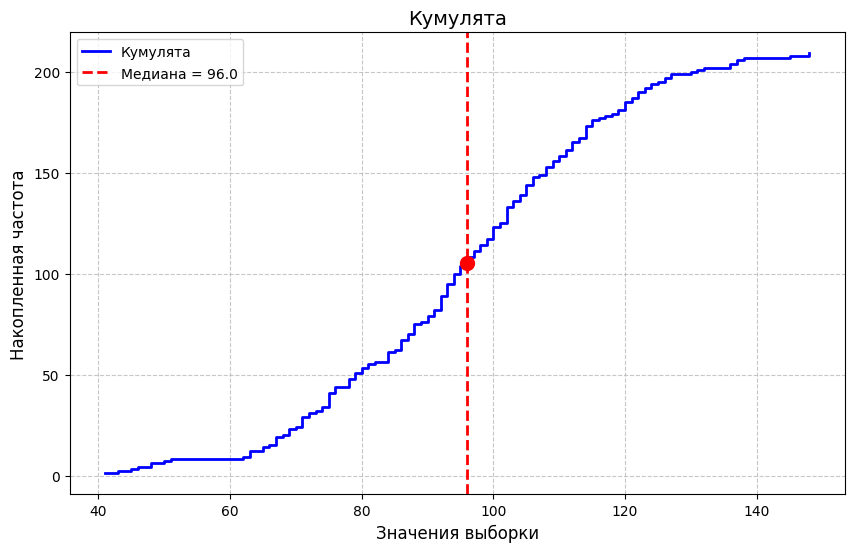

In [ ]:
# Упорядочиваем данные по возрастанию
sorted_data = np.sort(data)

# Рассчитываем кумулятивные частоты (накопленная сумма)
cumulative_counts = np.arange(1, len(sorted_data) + 1)

# Нормализуем до долей (опционально)
cumulative_relative = cumulative_counts / len(sorted_data)

# Находим индекс медианы в отсортированном массиве
median_idx = np.where(sorted_data >= median)[0][0]

# Построение кумуляты
plt.figure(figsize=(10, 6))
plt.step(sorted_data, cumulative_counts, where='post', color='b', linewidth=2, label='Кумулята')

# Отмечаем медиану
plt.axvline(x=median, color='r', linestyle='--', linewidth=2, label=f'Медиана = {median}')
plt.scatter(median, cumulative_counts[median_idx], color='red', s=100, zorder=5)


plt.title('Кумулята', fontsize=14)
plt.xlabel('Значения выборки', fontsize=12)
plt.ylabel('Накопленная частота', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Вывод о распределении генеральной совокупности:** На основании анализа коэффициентов асимметрии и эксцесса, а также сравнения моды, медианы и среднего (предположительно), можно выдвинуть гипотезу о том, что распределение генеральной совокупности близко к нормальному , с:
Небольшой левой асимметрией.
Это может говорить о наличии некоторых ограничений или выбросов в левой части распределения.


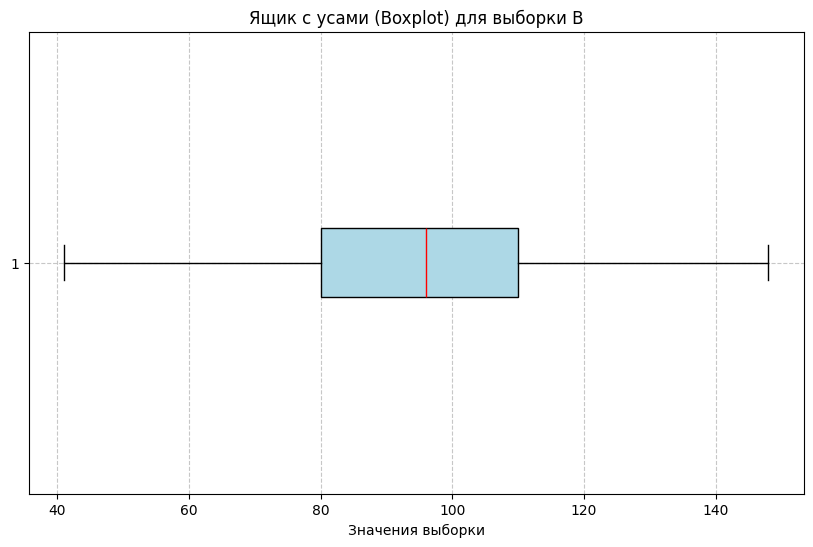

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные выборки B
data_B = np.array([
    107, 78, 93, 81, 80, 92, 126, 93, 67, 50, 104, 110,
    120, 91, 101, 91, 120, 88, 69, 74, 102, 65, 48, 71,
    103, 67, 95, 112, 112, 86, 99, 99, 103, 122, 112, 102,
    92, 69, 105, 106, 124, 46, 72, 75, 126, 73, 106, 75,
    80, 92, 68, 112, 127, 88, 93, 74, 131, 51, 117, 145,
    96, 76, 71, 138, 104, 120, 67, 92, 130, 99, 94, 92,
    97, 105, 84, 78, 100, 98, 114, 113, 94, 108, 76, 88,
    91, 78, 96, 81, 116, 75, 120, 75, 62, 113, 109, 111,
    127, 63, 87, 86, 66, 100, 75, 84, 95, 121, 103, 95,
    70, 98, 67, 148, 95, 92, 105, 114, 98, 102, 41, 76,
    114, 90, 97, 111, 93, 110, 79, 63, 109, 69, 108, 71,
    111, 100, 136, 92, 84, 123, 84, 125, 102, 96, 72, 102,
    90, 136, 87, 132, 137, 100, 102, 88, 65, 75, 114, 79,
    122, 63, 115, 90, 78, 86, 122, 119, 87, 115, 96, 137,
    106, 105, 88, 75, 100, 84, 71, 123, 121, 94, 114, 94,
    93, 118, 94, 102, 109, 86, 45, 97, 93, 43, 48, 114,
    85, 79, 124, 89, 104, 108, 108, 100, 106, 102, 105, 119,
    71, 86, 115, 82, 101
])

# Построение ящика с усами
plt.figure(figsize=(10, 6))
plt.boxplot(data_B, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='orange', marker='o'))

plt.title('Ящик с усами (Boxplot) для выборки B')
plt.xlabel('Значения выборки')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные выборки B
data_B = np.array([
    107, 78, 93, 81, 80, 92, 126, 93, 67, 50, 104, 110,
    120, 91, 101, 91, 120, 88, 69, 74, 102, 65, 48, 71,
    103, 67, 95, 112, 112, 86, 99, 99, 103, 122, 112, 102,
    92, 69, 105, 106, 124, 46, 72, 75, 126, 73, 106, 75,
    80, 92, 68, 112, 127, 88, 93, 74, 131, 51, 117, 145,
    96, 76, 71, 138, 104, 120, 67, 92, 130, 99, 94, 92,
    97, 105, 84, 78, 100, 98, 114, 113, 94, 108, 76, 88,
    91, 78, 96, 81, 116, 75, 120, 75, 62, 113, 109, 111,
    127, 63, 87, 86, 66, 100, 75, 84, 95, 121, 103, 95,
    70, 98, 67, 148, 95, 92, 105, 114, 98, 102, 41, 76,
    114, 90, 97, 111, 93, 110, 79, 63, 109, 69, 108, 71,
    111, 100, 136, 92, 84, 123, 84, 125, 102, 96, 72, 102,
    90, 136, 87, 132, 137, 100, 102, 88, 65, 75, 114, 79,
    122, 63, 115, 90, 78, 86, 122, 119, 87, 115, 96, 137,
    106, 105, 88, 75, 100, 84, 71, 123, 121, 94, 114, 94,
    93, 118, 94, 102, 109, 86, 45, 97, 93, 43, 48, 114,
    85, 79, 124, 89, 104, 108, 108, 100, 106, 102, 105, 119,
    71, 86, 115, 82, 101
])

# Размер выборки и число интервалов (по Стерджесу)
n = len(data_B)
k = int(1 + np.log2(n))  # правило Стерджеса
data_min, data_max = data_B.min(), data_B.max()
h = (data_max - data_min) / k  # ширина интервала

# Границы интервалов
bins = np.arange(data_min, data_max + h, h)

# Частоты и накопленные частоты
freq, bin_edges = np.histogram(data_B, bins=bins)
cum_freq = np.cumsum(freq)

# Огива: X — правые границы, Y — накопленные частоты
ogive_x = bin_edges[1:]
ogive_y = cum_freq

# Построение огивы
plt.figure(figsize=(10, 6))
plt.plot(ogive_x, ogive_y, marker='o', linestyle='-', color='blue')
plt.title('Огива (накопленные частоты) для выборки B')
plt.xlabel('Значения')
plt.ylabel('Накопленная частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(bins, rotation=45)
plt.show()
